In [26]:
!pip install seaborn

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
data = pd.read_csv("APA-DDoS-Dataset.csv")
data.head

<bound method NDFrame.head of               ip.src        ip.dst  tcp.srcport  tcp.dstport  ip.proto  \
0        192.168.1.1  192.168.23.2         2412         8000         6   
1        192.168.1.1  192.168.23.2         2413         8000         6   
2        192.168.1.1  192.168.23.2         2414         8000         6   
3        192.168.1.1  192.168.23.2         2415         8000         6   
4        192.168.1.1  192.168.23.2         2416         8000         6   
...              ...           ...          ...          ...       ...   
151195  192.168.19.1  192.168.23.2        37360         8000         6   
151196  192.168.19.1  192.168.23.2        37362         8000         6   
151197  192.168.19.1  192.168.23.2        37364         8000         6   
151198  192.168.19.1  192.168.23.2        37366         8000         6   
151199  192.168.19.1  192.168.23.2        37368         8000         6   

        frame.len  tcp.flags.syn  tcp.flags.reset  tcp.flags.push  \
0           

In [29]:
data=data.drop(columns=["tcp.dstport","ip.proto","tcp.flags.syn","tcp.flags.reset","tcp.flags.ack","ip.flags.mf","ip.flags.rb","tcp.seq","tcp.ack"])


In [30]:
columns=data.columns
print(columns)

Index(['ip.src', 'ip.dst', 'tcp.srcport', 'frame.len', 'tcp.flags.push',
       'ip.flags.df', 'frame.time', 'Packets', 'Bytes', 'Tx Packets',
       'Tx Bytes', 'Rx Packets', 'Rx Bytes', 'Label'],
      dtype='object')


In [31]:
from sklearn.model_selection import train_test_split

rest_data, sampled_data = train_test_split(data, test_size=0.005, stratify=data['Label'], random_state=42)


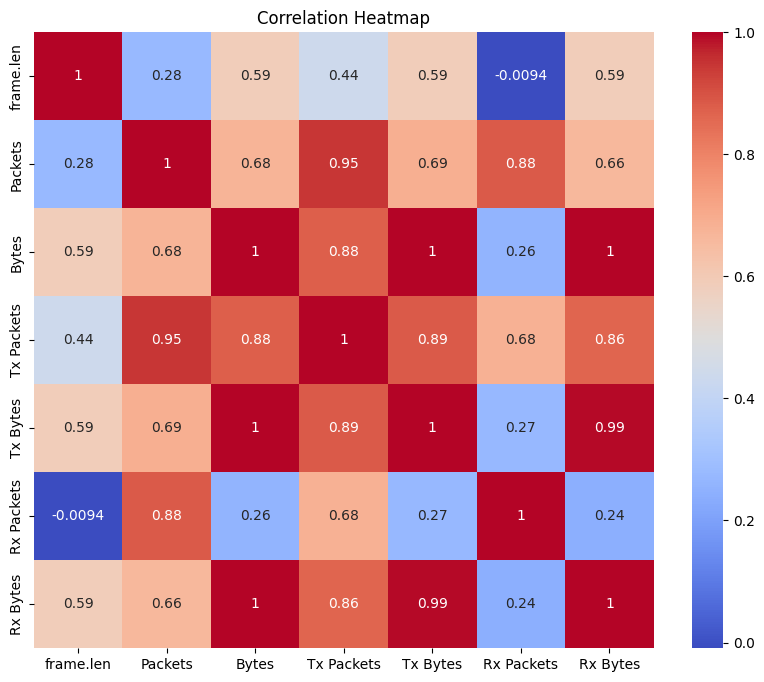

In [32]:
numeric_columns = ['frame.len', 'Packets', 'Bytes', 'Tx Packets', 'Tx Bytes', 'Rx Packets', 'Rx Bytes']
numeric_data = sampled_data[numeric_columns]
corr_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


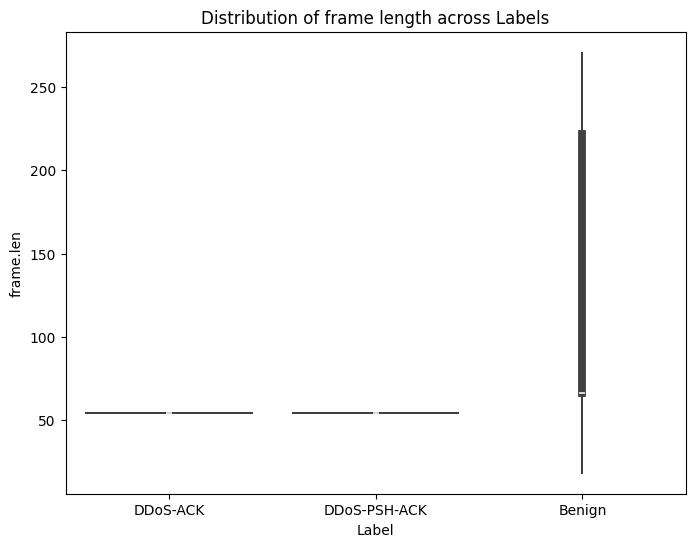

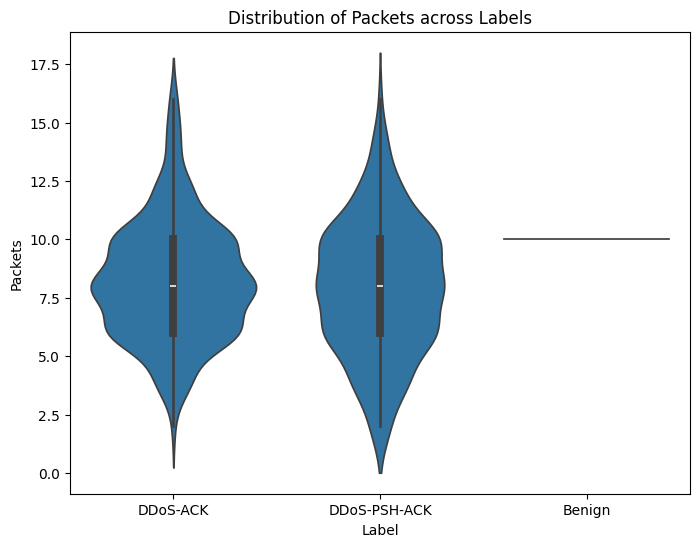

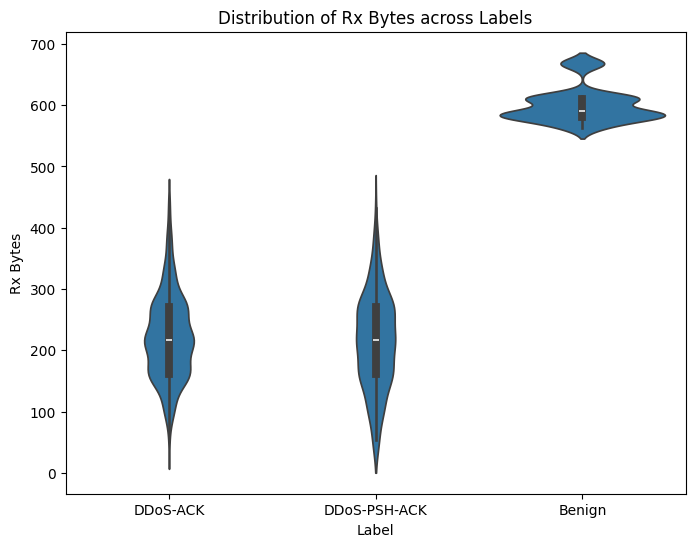

In [33]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=sampled_data, x='Label', y='frame.len')
plt.title('Distribution of frame length across Labels')
plt.xlabel('Label')
plt.ylabel('frame.len')

plt.show()
plt.figure(figsize=(8, 6))
sns.violinplot(data=sampled_data, x='Label', y='Packets')
plt.title('Distribution of Packets across Labels')
plt.xlabel('Label')
plt.ylabel('Packets')
plt.show()

plt.figure(figsize=(8, 6))
sns.violinplot(data=sampled_data, x='Label', y='Rx Bytes')
plt.title('Distribution of Rx Bytes across Labels')
plt.xlabel('Label')
plt.ylabel('Rx Bytes')
plt.show()

In [34]:
from matplotlib.backends.backend_pdf import PdfPages

pdf_pages = PdfPages('plots_sarthak.pdf')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
pdf_pages.savefig()  
plt.close()

plt.figure(figsize=(8, 6))
sns.violinplot(data=sampled_data, x='Label', y='frame.len')
plt.title('Distribution of frame length across Labels')
plt.xlabel('Label')
plt.ylabel('frame.len')
pdf_pages.savefig()  
plt.close()

plt.figure(figsize=(8, 6))
sns.violinplot(data=sampled_data, x='Label', y='Packets')
plt.title('Distribution of Packets across Labels')
plt.xlabel('Label')
plt.ylabel('Packets')
pdf_pages.savefig()  
plt.close()

plt.figure(figsize=(8, 6))
sns.violinplot(data=sampled_data, x='Label', y='Rx Bytes')
plt.title('Distribution of Rx Bytes across Labels')
plt.xlabel('Label')
plt.ylabel('Rx Bytes')
pdf_pages.savefig()  
plt.close()


pdf_pages.close()
